In [1]:
# In this notebok we will discuss central tendencies for datasets

In [2]:
# Suppose we some data, for understanding purpose we will assume 1-dimensional data

In [45]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [4]:
data =np. array([10,20,5,30,60,10,40,35,25,17,23,41,33,20])

In [5]:
# MEAN.

In [6]:
def mean(data):
    return np.mean(data)

mean_val = mean(data)
print(mean_val)

26.357142857142858


In [7]:
#Let's say we introduce one more datapoint whose value is 200. Again calculate the mean.
new_data = data 
new_data = np.append(new_data,200)
new_mean = np.mean(new_data)
print("New mean after adding a new datapoint: ",new_mean)

New mean after adding a new datapoint:  37.93333333333333


In [8]:
#Percentage increase in mean after adding one datapoint

In [9]:
def percent_increase(new_val,old_val):
    return ((new_val-old_val)*100/old_val)

percent_inc = percent_increase(new_mean, mean_val)
print("Percent increase in mean after adding one datapoint(outlier): ",percent_inc,"%")

Percent increase in mean after adding one datapoint(outlier):  43.92050587172537 %


In [10]:
#observations from the above example
#1. Mean is dependent on every data point of the dataset.
#2. If the dataset have some outliers then it may give a misleading picture about the dataset

#If a dataset has outliers and they are bad datapoints then mean can convey a wrong idea about the dataset.

In [11]:
#Median
#Median is the middle most value(if datapoints are sorted) or average of two middle most values
#(if number of datapoints are even) afer sorting the datapoints.

In [12]:
def median(data):
    n =len(data)
    sorted_data = sorted(data)
    midpoint = n//2
    if n%2==1:
        return sorted_data[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_data[lo]+sorted_data[hi])//2

median_val = median(data)
print("median value: ",median_val)

median value:  24


In [13]:
#supose we add one data point 200(an outlier) just as we did in case of mean

In [14]:
new_median_val = median(new_data)
print("new median value: ",new_median_val)

new median value:  25


In [15]:
percent_inc = percent_increase(new_median_val,median_val)
print("Percent increase in median after adding one datapoint(outlier): ",percent_inc,"%")

Percent increase in median after adding one datapoint(outlier):  4.166666666666667 %


In [16]:
#As you can see from the above, the median doesn't change much from the addition of an 
#outlier because median doesn't depend on every datapoint

In [17]:
#Generealizaion of mean is quantile, which represents a value less than which a certain percentile of data lies.
#For example: the median represents the value less than which 50% of data lies
def quantile(data,pth_percentile):
    p_index = int(len(data)*pth_percentile)
    return sorted(data)[p_index]

print("value less than which 10 percentile data lies: ",quantile(data,.1))
print("value less than which 25 percentile data lies: ",quantile(data,.25))
print("value less than which 50 percentile data lies: ",quantile(data,.5))
print("value less than which 75 percentile data lies: ",quantile(data,.75))

value less than which 10 percentile data lies:  10
value less than which 25 percentile data lies:  17
value less than which 50 percentile data lies:  25
value less than which 75 percentile data lies:  35


In [18]:
from collections import Counter
#mode is also a central tendency for most common values.
def mode_(data):
    counts = Counter(data)
    max_count = max(counts.values())
    return [mode_val for mode_val,count in counts.items() if count==max_count]

print("mode of data is: ",mode_(data))

mode of data is:  [10, 20]


In [19]:
#Next we will learn about Dispersion
#Dispersion refers to how spread out our data is.
#There are some statisticsmeasures in which values near zero signify not spread out at all. 
#And for large values it means very spread out.
#For example, a simple measure for dispersion can be difference between largest and smallest elements.
def data_dispersion(data):
    return max(data)-min(data)

print("Dispersion of data: ",data_dispersion(data))

Dispersion of data:  55


In [20]:
#This is not a good measue as you can see if our data has only 0 and 100 and 
#another data has 0, 50 and 100 values only than both will have same data range and hence the same dispersion 

In [21]:
#Another measure for dispersion is variance
def variance(data):
    x_bar = mean(data)
    diff = [(xi-x_bar)**2 for xi in data]
    return np.sum(diff)/(len(data)-1)

print("Variance of data: ",variance(data))

Variance of data:  218.2472527472528


In [22]:
# This looks like it is almost the average squared deviation from the mean, except that we’re dividing by n-1
# instead of n . In fact, when we’re dealing with a sample from a larger population, x_bar is only an estimate
# of the actual mean, which means that on average (x_i - x_bar) ** 2 is an underestimate of x_i ’s squared
# deviation from the mean, which is why we divide by n-1 instead of n

# Variance has the units that are square of the original units, so in orde to have same units as other
# central tendency, we will use standard deviation which is square root of variance

In [23]:
def standard_Deviation(data):
    return np.sqrt(variance(data))

sd = standard_Deviation(data)
print("Standard deviation of data: ",standard_Deviation(data))

Standard deviation of data:  14.773193721983503


In [24]:
# Standard deviation also has a outlier problem as seen in the mean.
# For example, if we have a datapoint having value 200 in the dataset
new_sd = standard_Deviation(new_data)
print("Standard deviation of new data: ",new_sd)
print("Percent increase in standard deviation after adding one datapoint(outlier): ",percent_increase(new_sd,sd),"%")

Standard deviation of new data:  47.040205700878396
Percent increase in standard deviation after adding one datapoint(outlier):  218.41595382912644 %


In [25]:
# A more robust alternative computes the difference between the 75th percentile value and the 25th percentile value
def interquartile_range(data):
    return quantile(data,.75) - quantile(data,.25)

print("Interquartile between .75th and .25th percentile: ",interquartile_range(data))

print("Interquartile between .75th and .25th percentile with an outiler datapoint: ",interquartile_range(new_data))
print("Percent increase in standard deviation after adding one datapoint(outlier): ",
      percent_increase(interquartile_range(new_data),interquartile_range(data)),"%")

Interquartile between .75th and .25th percentile:  18
Interquartile between .75th and .25th percentile with an outiler datapoint:  23
Percent increase in standard deviation after adding one datapoint(outlier):  27.77777777777778 %


In [26]:
#COVARIANCE
#Covariance measures how two variables vary in tandem from their means
def de_mean(data):
    x_bar = mean(data)
    diff = [(xi-x_bar) for xi in data]
    return diff
    
def covariance(x,y):
    n = len(x)
    return np.dot(de_mean(x),de_mean(y))/(n-1)

In [47]:
# Now suppose, we have 2 variables x and y.
# x represents number of friends a person have on social media
# y represents number of minutes he/she spent on social media
x = [4,6,2,10,15,7,9]
y = [3,5,1,12,17,6,8]
print("Covariance of x and y: ",covariance(x,y))

Covariance of x and y:  23.21428571428571


In [28]:
# If covariance has large positive value it means that x tends to be large when y is large.
# If covariance has large negative value it means that x tends to be large when y is small and vice-versa.
# if covariance is closer to zero means, it means no such relationship exists between x and y

# There are certain issues with covariance
# For instance, if we double the value of x and y then the covariance will be doubled,
# but in sense x and y would be just as interrelated as before.

# To overcome this problem, correlation can be used.

In [29]:
def correlation(x,y):
    std_x = standard_Deviation(x)
    std_y = standard_Deviation(y)
    if std_x>0 and std_y >0:
        return covariance(x,y)/(std_x*std_y)
    return 0

In [48]:
print("Correlation of x and y: ",correlation(x,y))

Correlation of x and y:  0.9864622039565963


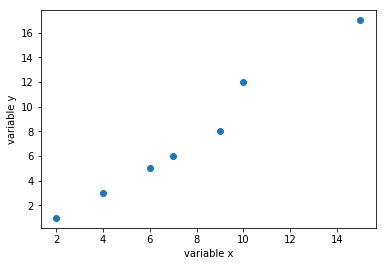

In [53]:
plt.scatter(x,y)
plt.xlabel("variable x")
plt.ylabel("variable y")
plt.show()

In [ ]:
# Correlation value is between -1 and 1
# -1 = perfect anti-correlation
# 1 = perfect correlation
# 0 = no correlation
# Correlations are very sensitive to outlier

[4, 6, 2, 10, 15, 7, 9] [3, 5, 1, 12, 17, 6, 8]


In [54]:
# lets add outliers to our dataset
new_x = np.append(x,20)
new_y = np.append(y,1)
print("Correlation of x and y with outliers: ",correlation(new_x,new_y))

Correlation of x and y with outliers:  0.3003496094551851


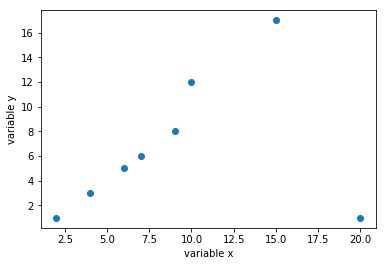

In [55]:
plt.scatter(new_x,new_y)
plt.xlabel("variable x")
plt.ylabel("variable y")
plt.show()

In [58]:
# Correlation may give you misleading results if we don't know our cofounding variables well. Simpson's paradox is
# one such scenario.
# In some scenarios, it may happen that the variables have a relationship and the correlation is zero.
#For example, 
x1 = [-2,-1,0,1,2] 
y1 = [2,1,0,1,2]
print('Correlation :',correlation(x1,y1))

Correlation : 0.0


In [59]:
# Here the correlation is zero, but we can see that y = |x|
# Correlation captures the relationship in which knowing how x_i compares to mean(x) gives 
# us information about how y_i compares to mean(y)  